 # Major Project 

## Life Expectancy Analysis

### Data Used - [Life Expectancy(WHO)](https://www.kaggle.com/kumarajarshi/life-expectancy-who)

### Introduction

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

#### Importing Libraries 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from scipy.stats.mstats import winsorize
import array

#### Use Of warning library to ingore the warnings Shown durinng the implementation of ML Techniques

In [3]:
import warnings
warnings.filterwarnings("ignore")

#### Reading The Dataset

In [4]:
Life_Expectancy_Data= pd.read_csv("Life Expectancy Data.csv")

#### Copy of the orignal data is used to insure no chnages are made to the Orignal Dataset

In [5]:
data = Life_Expectancy_Data.copy()
data = data.dropna() # Dropping Null Values  

### Data Exploration

In [32]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
Country                            1649 non-null object
Year                               1649 non-null int64
Status                             1649 non-null object
Life expectancy                    1649 non-null float64
Adult Mortality                    1649 non-null float64
infant deaths                      1649 non-null int64
Alcohol                            1649 non-null float64
percentage expenditure             1649 non-null float64
Hepatitis B                        1649 non-null float64
Measles                            1649 non-null int64
 BMI                               1649 non-null float64
under-five deaths                  1649 non-null int64
Polio                              1649 non-null float64
Total expenditure                  1649 non-null float64
Diphtheria                         1649 non-null float64
 HIV/AIDS                          1649 non-null

In [34]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [39]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1649 rows and 22 columns


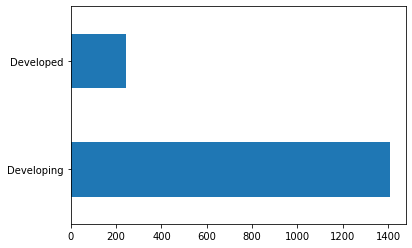

In [35]:
data["Status"].value_counts().plot.barh(); 

In [51]:
data['winsorized_lifeexpenctancy'] = winsorize(data['Life expectancy '], (0.0409, 0))
#Winsorizing or winsorization is the transformation of statistics by limiting extreme values 
#in the statistical data to reduce the effect of possibly spurious outliers.

Text(0, 0.5, 'Life Expectancy')

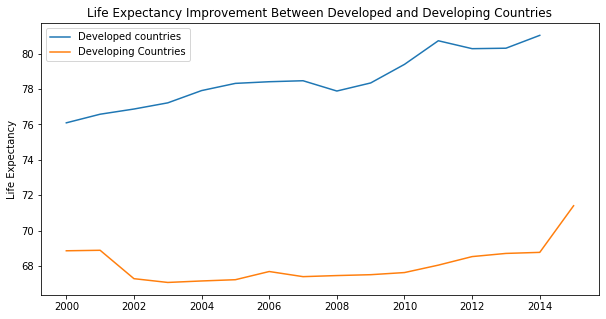

In [52]:
aa = data[data["Status"] == "Developed"].groupby(["Year"])['winsorized_lifeexpenctancy'].mean()
ab = data[data["Status"] == "Developing"].groupby(["Year"])['winsorized_lifeexpenctancy'].mean()

plt.figure(figsize = (10,5))
plt.plot(aa)
plt.plot(ab)
plt.legend(["Developed countries", "Developing Countries"])
plt.title("Life Expectancy Improvement Between Developed and Developing Countries")
plt.ylabel("Life Expectancy")

In [53]:
data['winsorized_GDP'] = winsorize(data['GDP'], (0, 0.12))

Text(0, 0.5, 'Life Expectancy')

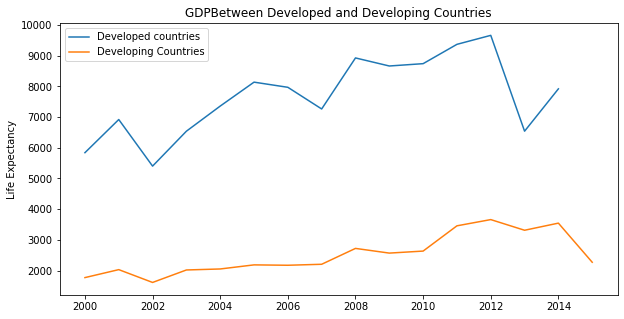

In [54]:
aa = data[data["Status"] == "Developed"].groupby(["Year"])['winsorized_GDP'].mean()
ab = data[data["Status"] == "Developing"].groupby(["Year"])['winsorized_GDP'].mean()

plt.figure(figsize = (10,5))
plt.plot(aa)
plt.plot(ab)
plt.legend(["Developed countries", "Developing Countries"])
plt.title("GDPBetween Developed and Developing Countries")
plt.ylabel("Life Expectancy")

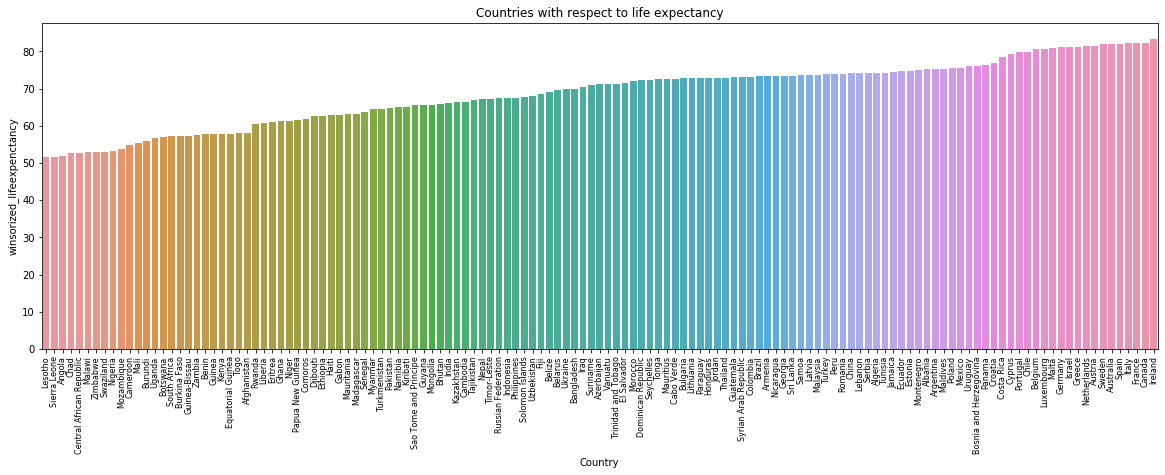

In [55]:
sorted_le = (data.groupby('Country')['winsorized_lifeexpenctancy'].mean()).sort_values()
plt.figure(figsize=(20,6))
xx = sns.barplot(x = sorted_le.index, y = sorted_le)
xx.set_xticklabels(xx.get_xticklabels(), rotation=90, fontsize=8)
xx.set_title('Countries with respect to life expectancy')
plt.show()

### Correlation

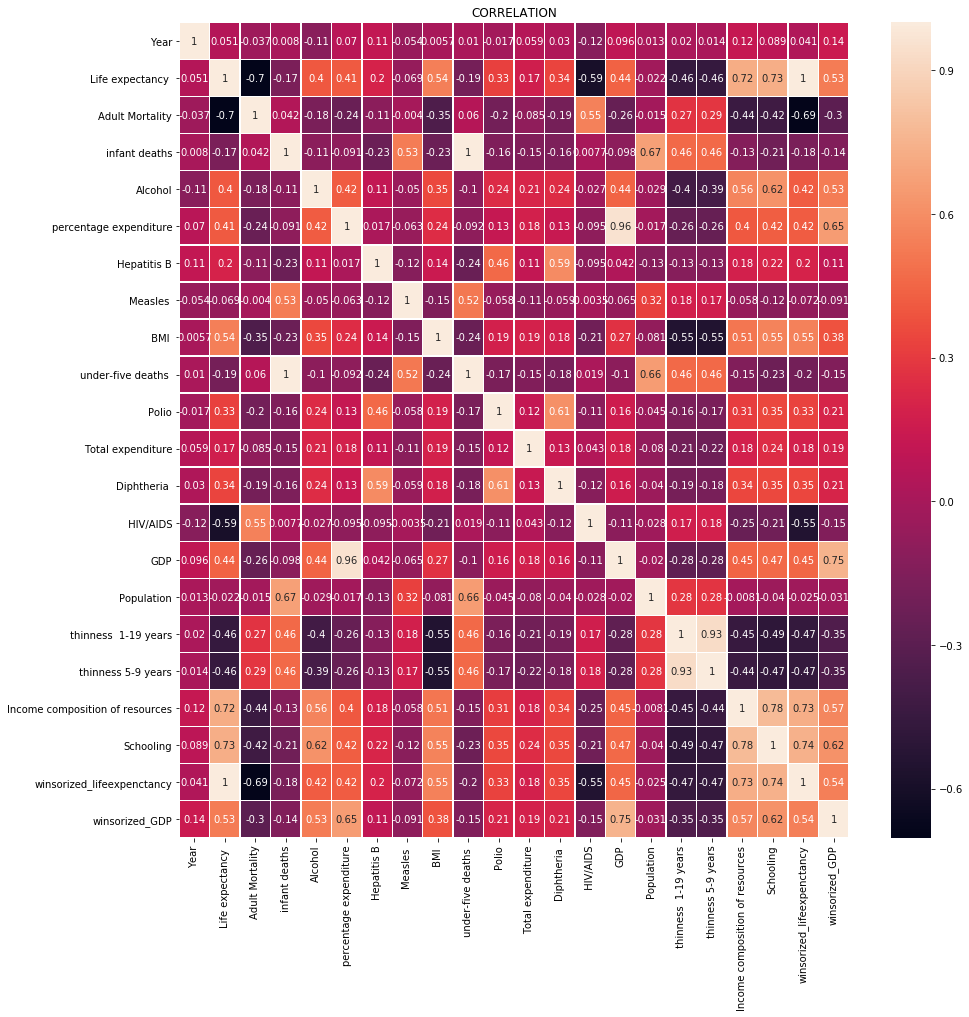

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linecolor='white',linewidths=0.5);
plt.title("CORRELATION");

### Highly Correlated Attributes
1. GDP vs Percentage Expenditure
2. thinness 5-9 years vs thinness 1-19 years

# Model Traning

## Regression Techniques

### 1. Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression. 

In [203]:
lindata = data.copy() # Using data copy 

In [204]:
X=pd.DataFrame(lindata.iloc[:,7])  # Percentage Expenditure 
y=pd.DataFrame(lindata.iloc[:,16]) # GDP

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other words independently for each column of the data)

In [205]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
Sc.fit_transform(X)

array([[-0.35690875],
       [-0.35563283],
       [-0.35580588],
       ...,
       [-0.39743857],
       [-0.39743857],
       [-0.39743857]])

Now after the data has been preprocessed we have split our data for training and testing our model. 
We have divided our data in 70:30 ratio as 70% for training our model and 30% for testing our trained model.

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In linear regression, coefficients are the values that multiply the predictor values. The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable. A positive sign indicates that as the predictor variable increases, the response variable also increases.

The intercept (often labeled the constant) is the expected mean value of Y when all X=0. Start with a regression equation with one predictor, X. If X sometimes equals 0, the intercept is simply the expected mean value of Y at that value.

In [207]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("Coeff is: ",regressor.coef_)
print("Intercept is: ",regressor.intercept_)

Coeff is:  [[6.28116283]]
Intercept is:  [1203.70146074]


In [208]:
predictor=regressor.predict(X_test)

In [209]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared error: ",mean_squared_error(y_test,predictor))
print("R2 score: ",r2_score(y_test,predictor))
reg_arr=array.array('f',)
reg_arr.append(r2_score(y_test,predictor))

Mean Squared error:  6780182.408725343
R2 score:  0.930168157189668


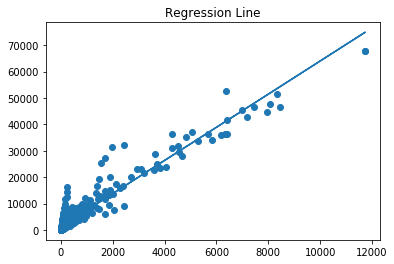

In [210]:
plt.scatter(X_test,y_test);
plt.plot(X_test,regressor.predict(X_test));
plt.title("Regression Line");

The graph shows the regression line of the best fit passing through the points of X and y. We can see that the regression line almost passing through mid of the points and its the line of best fit.

### 2. Multple Linear Regression 

The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable. In essence, multiple regression is the extension of ordinary least-squares (OLS) regression that involves more than one explanatory variable.

In [211]:
multidata = data.copy() # Using Data Copy

In [212]:
multidata.drop(["Country", "Status"], axis=1, inplace=True)  
# When we look at the data of Country and Status columns, it consists of objects.
#let's drop it. because we need int or float

In [213]:
x = multidata.iloc[:, [-2,-1]].values                                   
# I got the last two columns (Income composition of resources, schooling) as independent variables
y = multidata["percentage expenditure"].values.reshape(-1,1) 
# dependent variable

Now after the data has been preprocessed we have split our data for training and testing our model. 
We have divided our data in 80:20 ratio as 80% for training our model and 20% for testing our trained model.

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [215]:
print("b0: ", lm.intercept_)
print("b1,b2: ", lm.coef_)

b0:  [-1687.31230047]
b1,b2:  [[20.77531305  0.29038605]]


In [216]:
# We look at the data set we have created will affect our life expectancy.
new_data = [[0.4,8], [0.5,10]]   
new_data = pd.DataFrame(new_data).T  # .T translates the table.

pred = model.predict(new_data) 

In [217]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
rmse
model.score(x_train, y_train)

0.4401693370022165

### Multiple Linear Regressor Using Cross Validation

In [218]:
# CV2 r2 value of the model
#Cross-validation, sometimes called rotation estimation or out-of-sample testing,
#is any of various similar model validation techniques for assessing how the results of a
#statistical analysis will generalize to an independent data set.
cross_val_score(model, x_train,  y_train, cv= 10, scoring="r2").mean()

0.43844440032632115

In [219]:
# train predictions:
y_head = model.predict(x_test)
y_head[0:5]
# r2 is our value:
r2_degree = r2_score(y_test, y_head)
print("r2 score = ",r2_degree) 

r2 score =  0.36898446652782


### 3.  Polynomial Regression 

In [220]:
from sklearn.preprocessing import PolynomialFeatures     
# Gives polynomial features

In [221]:
polydata = data.copy()

In [222]:
# Let's see what our spending percentages are compared to the GDP increase. Let's create and fit our Polynomial model

X=pd.DataFrame(polydata.iloc[:,7])  # Percentage Expenditure 
y=pd.DataFrame(polydata.iloc[:,16]) # GDP
linear_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state= 42)

In [224]:
pf=PolynomialFeatures(degree=2)

In [225]:
X_pf=pf.fit_transform(X)

In [226]:
lr=LinearRegression()
lr.fit(X_pf,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [227]:
y_pf_pred=lr.predict(X_pf)

In [228]:
print("Mean Squared Error: ",mean_squared_error(y,y_pf_pred))
print("R2 Score: ",r2_score(y,y_pf_pred))
reg_arr.append(r2_score(y,y_pf_pred))


Mean Squared Error:  10378976.693577012
R2 Score:  0.9211422346918631


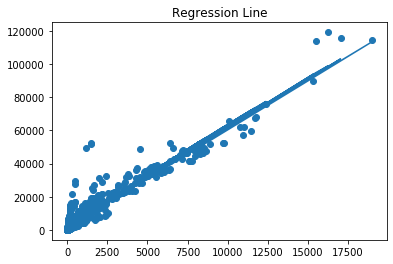

In [229]:
plt.scatter(X,y);
plt.plot(X,y_pf_pred);
plt.title("Regression Line");

### 4. Decision Tree Regressor

A Decision Tree is an algorithm used for supervised learning problems such as classification or regression.Each leaf of the tree is labeled with a class or a probability distribution over the classes. A tree can be "learned" by splitting the source set into subsets based on an attribute value test.

In [230]:
from sklearn.tree import DecisionTreeRegressor  

In [231]:
dtdata = data.copy()

In [232]:
x = dtdata.GDP.values.reshape(-1,1)
y = dtdata['percentage expenditure'].values.reshape(-1,1)

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

In [234]:
regressor = DecisionTreeRegressor()  
regressor.fit(x_train, y_train) 
y_pred = regressor.predict(x_test)    

In [235]:
print("Mean Square error: ",mean_squared_error(y_test,y_pred))
print("R2 score: ",r2_score(y_test,y_pred))
reg_arr.append(r2_score(y_test,y_pred))

Mean Square error:  479281.4357808568
R2 score:  0.7214141226237405


### DECISION TREE USING CROSS VALIDATION

In [236]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=regressor, X=x_train, y=y_train, cv=10)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())
reg_arr.append(scores.mean())

Mean:  0.8767333188599189
Standard Deviation:  0.09860458507656114


We notice that using Cross Validation we get a score of 87.7% where as without it we get a score of 72.1% hence we accept the Cross Validation score

### 5. KNN Regressor

In [237]:
from sklearn.neighbors import KNeighborsRegressor

In [238]:
reg = KNeighborsRegressor(n_neighbors=3)

In [239]:
reg.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [240]:
y_pred=reg.predict(x_test)

In [241]:
print("Mean Squred Error: ",mean_squared_error(y_test,y_pred))
print("R2 score: ",r2_score(y_test,y_pred))
reg_arr.append(r2_score(y_test,y_pred))

Mean Squred Error:  384461.3749377677
R2 score:  0.7765289838947711


### 6. SVM

In [242]:
from sklearn.svm import SVR

In [243]:
svm_reg = SVR(kernel="rbf")
svm_reg.fit(x_train, y_train)
y_pred = svm_reg.predict(x_test)

In [244]:
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse
print("R2 Score: ",r2_score(y_test,y_pred))
reg_arr.append(r2_score(y_test,y_pred))

R2 Score:  -0.11156022888418082


SVM Regressor technique gives accuracy in negative. Hence it would be ignored as it is not a good choice for our model.

### 7. Random Forrest

In [245]:
from sklearn.ensemble import RandomForestRegressor

In [246]:
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(x_train, y_train)
y_pred = forest_reg.predict(x_test)

In [247]:
forest_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",forest_mse)
print("R2 Score: ",r2_score(y_test,y_pred))
reg_arr.append(r2_score(y_test,y_pred))

Mean Squared Error:  398992.3462962943
R2 Score:  0.7680827493802856


### Random Forrest using cross validation

In [248]:
from sklearn.model_selection import cross_val_score

In [249]:
scores = cross_val_score(estimator=forest_reg, X=x_train, y=y_train, cv=10)

In [250]:
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())
reg_arr.append(scores.mean())

Mean:  0.9127444933530822
Standard Deviation:  0.060042711782597236


### Final Score Using Regression Techniques

In [576]:
list=['Linear Regression','Polynomial Featues','Decision tree','Decision Tree using CV','KNN','SVM','Random Forest','RF using CV']
Reg=pd.DataFrame(reg_arr,index=list)
Reg

,0
Linear Regression,0.930168
Polynomial Featues,0.921142
Decision tree,0.721414
Decision Tree using CV,0.876733
KNN,0.776529
SVM,-0.111560
Random Forest,0.768083
RF using CV,0.912745


# Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [9]:
df1 = Life_Expectancy_Data.copy() 
data = data.dropna() # Dropping Null Values  

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [11]:
data['winsorized_lifeexpenctancy'] = winsorize(data['Life expectancy '], (0.0409, 0))
#Winsorizing or winsorization is the transformation of statistics by limiting extreme values 
#in the statistical data to reduce the effect of possibly spurious outliers.

In [14]:
X=df.iloc[:,[14,16]]
y=pd.DataFrame(df.iloc[:,2])

In [15]:
X['GDP']=pd.DataFrame(X['GDP']).fillna(X['GDP'].mean())
X['Diphtheria ']=pd.DataFrame(X['Diphtheria ']).fillna(X['Diphtheria '].mean())

In [16]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

In [17]:
A=df1.iloc[:,[14,16]]
B=df1.iloc[:,2]
bestfeatures = SelectKBest(score_func=chi2, k=1)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Diptheria','GDP']  
print(featureScores)  

     Diptheria           GDP
0  Diphtheria   9.368000e+02
1          GDP  1.346774e+07


## Classification Techniques

 In machine learning and statistics, classification is a supervised learning approach in which the computer program learns from the data input given to it and then uses this learning to classify new observation.

#### Importing Data For Classification Model

In [13]:
df = pd.read_csv("Life Expectancy Data.csv")

#### Preparing data for Classification techniques

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X=df.iloc[:,[14,16]]
y=pd.DataFrame(df.iloc[:,2])

In [62]:
X.isnull().sum()

Diphtheria      19
GDP            448
dtype: int64

In [63]:
X['GDP']=pd.DataFrame(X['GDP']).fillna(X['GDP'].mean())

In [64]:
X['GDP'].isnull().sum()

0

In [65]:
X['Diphtheria ']=pd.DataFrame(X['Diphtheria ']).fillna(X['Diphtheria '].mean())

In [66]:
X.isnull().sum()

Diphtheria     0
GDP            0
dtype: int64

In [67]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

### 1. Decision Tree

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Standard Scaling is used to convert the values into a particular range for easier computation and faster solving.

In [83]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
des_pred = classifier.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, des_pred)
cm

array([[ 69,  76],
       [ 91, 646]], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, des_pred)
print("Accuracy: ",acc)
clf_arr=array.array('f',)
clf_arr.append(accuracy_score(y_test, des_pred))

Accuracy:  0.8106575963718821


Using Decision Tree classifier we get an Accuracy of 81%. The score can be considred good hence no changes ar made to the model.

In [87]:
from sklearn.metrics import classification_report
report=classification_report(y_test,des_pred)
print(report)

              precision    recall  f1-score   support

   Developed       0.43      0.48      0.45       145
  Developing       0.89      0.88      0.89       737

    accuracy                           0.81       882
   macro avg       0.66      0.68      0.67       882
weighted avg       0.82      0.81      0.81       882



### 2. Logistic Regressor

Logistic Regression is a 'Statistical Learning' technique categorized in 'Supervised' Machine Learning (ML) methods dedicated to 'Classification' tasks. It has gained a tremendous reputation for last two decades especially in financial sector due to its prominent ability of detecting defaulters.

In [88]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
logic_pred = classifier.predict(X_test)

Confusion Matrix for our model

In [90]:
cm=confusion_matrix(y_test,logic_pred)
cm

array([[ 44, 101],
       [ 33, 704]], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, logic_pred)
print("Accuracy: ",acc)
clf_arr.append(accuracy_score(y_test, logic_pred))

Accuracy:  0.8480725623582767


Using Logistic Regressor we get an Accuracy of 84%. The score can be considred good hence no changes ar made to the model.

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logic_pred))

              precision    recall  f1-score   support

   Developed       0.57      0.30      0.40       145
  Developing       0.87      0.96      0.91       737

    accuracy                           0.85       882
   macro avg       0.72      0.63      0.65       882
weighted avg       0.82      0.85      0.83       882



### 3.KNN

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [94]:
knn_pred = knn.predict(X_test)

In [95]:
confusion_matrix(y_test, knn_pred)

array([[ 59,  86],
       [ 61, 676]], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, knn_pred)
print("Accuracy: ",acc)
clf_arr.append(accuracy_score(y_test, knn_pred))

Accuracy:  0.8333333333333334


Using KNN as classifier we get an Accuracy of 83%. The score can be considred good hence no changes ar made to the model.

In [97]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

   Developed       0.49      0.41      0.45       145
  Developing       0.89      0.92      0.90       737

    accuracy                           0.83       882
   macro avg       0.69      0.66      0.67       882
weighted avg       0.82      0.83      0.83       882



### 4. SVM

In [98]:
from sklearn import svm
svm_model=svm.SVC(kernel='rbf', C=1,gamma="auto")
svm_model.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [99]:
svm_model_pred=svm_model.predict(X_test)

In [100]:
confusion_matrix(y_test,svm_model_pred)

array([[ 48,  97],
       [ 34, 703]], dtype=int64)

In [101]:
acc=accuracy_score(y_test,svm_model_pred)
print("Accuracy: ",acc)
clf_arr.append(accuracy_score(y_test,svm_model_pred))

Accuracy:  0.8514739229024944


In [102]:
print(classification_report(y_test,svm_model_pred))

              precision    recall  f1-score   support

   Developed       0.59      0.33      0.42       145
  Developing       0.88      0.95      0.91       737

    accuracy                           0.85       882
   macro avg       0.73      0.64      0.67       882
weighted avg       0.83      0.85      0.83       882



### 5. Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rfc= RandomForestClassifier()

In [105]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
rfc_pred=rfc.predict(X_test)

In [107]:
confusion_matrix(y_test,rfc_pred)

array([[ 70,  75],
       [ 84, 653]], dtype=int64)

In [108]:
acc = accuracy_score(y_test, rfc_pred)
print("Accuracy: ",acc)
clf_arr.append( accuracy_score(y_test, rfc_pred))

Accuracy:  0.8197278911564626


Using Random Forest Classifier we get an Accuracy of 81%. The score can be considred good hence no changes ar made to the model.

In [109]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

   Developed       0.45      0.48      0.47       145
  Developing       0.90      0.89      0.89       737

    accuracy                           0.82       882
   macro avg       0.68      0.68      0.68       882
weighted avg       0.82      0.82      0.82       882



### Final scores Using Classification Techniques

In [110]:
clf_List=['Decision Tree','Logistic Regression','KNN','SVM','Random Forest']
normal_clf=pd.DataFrame(clf_arr,index=clf_List)
Class = normal_clf.sort_values(by=0,ascending=False)
Class

,0
SVM,0.851474
Logistic Regression,0.848073
KNN,0.833333
Random Forest,0.819728
Decision Tree,0.810658


# Model Tuning

After analyzing the above results we could understand that a fine tuning could improve our results.

### K-Fold Cross Validation

k-Fold Cross-Validation. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k(here used cv) that refers to the number of groups that a given data sample is to be split into.

In [111]:
from sklearn.model_selection import cross_val_score

#### Decision Tree

In [112]:
scores = cross_val_score(estimator= DecisionTreeClassifier(criterion = 'entropy'), X=X_train, y=y_train, cv=10)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())
clf1_arr=array.array('f',)
clf1_arr.append(scores.mean())

Mean:  0.8219644523686813
Standard Deviation:  0.02001184075610366


#### Logistic Regressor

In [113]:
scores = cross_val_score(estimator=LogisticRegression(), X=X_train, y=y_train, cv=10)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())
clf1_arr.append(scores.mean())

Mean:  0.854590849363662
Standard Deviation:  0.016601273202464906


#### KNN

In [114]:
scores = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=5), X=X_train, y=y_train, cv=10)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())
clf1_arr.append(scores.mean())

Mean:  0.8312494834542863
Standard Deviation:  0.0210031601430458


#### SVM

In [115]:
scores = cross_val_score(estimator= svm.SVC(), X=X_train, y=y_train, cv=10)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())
clf1_arr.append(scores.mean())

Mean:  0.8565349649213225
Standard Deviation:  0.01630642406470137


#### Random Forest Classifier

In [116]:
scores = cross_val_score(estimator= RandomForestClassifier(), X=X_train, y=y_train, cv=10)
print("Mean: ",scores.mean())
print("Standard Deviation: ",scores.std())
clf1_arr.append(scores.mean())

Mean:  0.8248913512835869
Standard Deviation:  0.014051100806196481


In [117]:
Kfold=pd.DataFrame(clf1_arr,index=clf_List)
t1= Kfold.sort_values(by=0,ascending=False)

In [118]:
clf_List=['Decision Tree','Logistic Regression','KNN','SVM','Random Forest']
normal_clf=pd.DataFrame(clf_arr,index=clf_List)
torignal = normal_clf.sort_values(by=0,ascending=False)

##### Function to display Score Tables Side by Side

In [119]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

##### Before Model Tuning VS After Model Tuning

In [120]:
display_side_by_side(torignal,t1)

,0
SVM,0.851474
Logistic Regression,0.848073
KNN,0.833333
Random Forest,0.819728
Decision Tree,0.810658
,0
SVM,0.856535
Logistic Regression,0.854591
KNN,0.831249
Random Forest,0.824891


### Grid Search RV

In [519]:
from sklearn.model_selection import GridSearchCV

In [520]:
svm_clf=GridSearchCV(estimator=svm.SVC(gamma="auto",probability=True),param_grid={
    'C':[1,5,10],
    'kernel':['rbf']
},cv=5,return_train_score=False)
svm_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [521]:
svm_clf_df=pd.DataFrame(svm_clf.cv_results_)

In [522]:
svm_clf_df[['param_C','param_kernel','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_C,param_kernel,mean_test_score
0,1,rbf,0.86430
1,5,rbf,0.86284
2,10,rbf,0.86284


In [523]:
svm_clf_pred=svm_clf.predict(X_test)
acc = accuracy_score(y_test, svm_clf_pred)
print("Accuracy: ",acc)
grid_arr=array.array('f',)
grid_arr.append(accuracy_score(y_test, svm_clf_pred))

Accuracy:  0.8378684807256236


In [524]:
knn_clf=GridSearchCV(estimator=KNeighborsClassifier(),param_grid={
    "n_neighbors":[5,11],
    "metric":['euclidean','manhattan'],'weights':['uniform','distance']
},cv=5,return_train_score=False)

In [525]:
knn_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [526]:
knn_clf_df=pd.DataFrame(knn_clf.cv_results_)

In [527]:
knn_clf_df[['param_n_neighbors','param_metric','param_weights','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_n_neighbors,param_metric,param_weights,mean_test_score
6,11,manhattan,uniform,0.857490
2,11,euclidean,uniform,0.853599
7,11,manhattan,distance,0.848735
3,11,euclidean,distance,0.847763
4,5,manhattan,uniform,0.842899
0,5,euclidean,uniform,0.840953
5,5,manhattan,distance,0.840953
1,5,euclidean,distance,0.839008


In [528]:
knn_clf_pred=knn_clf.predict(X_test)
acc = accuracy_score(y_test, knn_clf_pred)
print("Accuracy: ",acc)
grid_arr.append(accuracy_score(y_test, knn_clf_pred))

Accuracy:  0.8435374149659864


In [529]:
rf_clf= GridSearchCV(estimator=RandomForestClassifier(),param_grid={
   "n_estimators" :[200,700],
    "max_features" : ['auto','sqrt','log2']
},cv=5,return_train_score=False)

In [530]:
rf_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [531]:
rf_clf_df=pd.DataFrame(rf_clf.cv_results_)

In [532]:
rf_clf_df[['param_n_estimators','param_max_features','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_n_estimators,param_max_features,mean_test_score
3,700,sqrt,0.839981
1,700,auto,0.839494
2,200,sqrt,0.839008
5,700,log2,0.839008
0,200,auto,0.838035
4,200,log2,0.836089


In [533]:
rf_clf_pred=rf_clf.predict(X_test)

In [534]:
acc = accuracy_score(y_test, rf_clf_pred)
print("Accuracy: ",acc)
grid_arr.append(accuracy_score(y_test, rf_clf_pred))

Accuracy:  0.8095238095238095


In [535]:
grid_List=['SVM','KNN','Random Forest']
grid_df=pd.DataFrame(grid_arr,index=grid_List)
t2 = grid_df.sort_values(by=0,ascending=False)

##### Before VS After Model Tuning Using Grid Search  RV

In [536]:
display_side_by_side(torignal,t2)

,0
SVM,0.837868
Logistic Regression,0.835601
KNN,0.820862
Random Forest,0.806122
Decision Tree,0.787982
,0
KNN,0.843537
SVM,0.837868
Random Forest,0.809524


### Voting Classifier

Voting is one of the simplest way of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but a wrapper for set of different ones that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm.

In [537]:
from sklearn.ensemble import VotingClassifier

### SVM
##### Hard Voting

n hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.

In [538]:
svm_voting_clf_hard= VotingClassifier(estimators=[('svm',svm_clf)],voting='hard')

In [539]:
svm_voting_clf_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=SVC(C=1.0, cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3, gamma='auto',
                                                         kernel='rbf',
                                                         max_iter=-1,
                                                         probability=True,
                                                         random_state=None,
                                                         shrinking=True,
                                                         tol=0.001,
            

In [540]:
svm_voting_clf_hard_pred=svm_voting_clf_hard.predict(X_test)

In [541]:
confusion_matrix(y_test,svm_voting_clf_hard_pred)

array([[ 44, 110],
       [ 33, 695]], dtype=int64)

In [542]:
acc = accuracy_score(y_test, svm_voting_clf_hard_pred)
print("Accuracy: ",acc)
voting_arr=array.array('f',)
voting_arr.append(accuracy_score(y_test, svm_voting_clf_hard_pred))

Accuracy:  0.8378684807256236


In [543]:
print(classification_report(y_test, svm_voting_clf_hard_pred))

              precision    recall  f1-score   support

   Developed       0.57      0.29      0.38       154
  Developing       0.86      0.95      0.91       728

    accuracy                           0.84       882
   macro avg       0.72      0.62      0.64       882
weighted avg       0.81      0.84      0.81       882



 F1 is usually more useful than accuracy, especially if you have an uneven class distribution.
 ###### Higher no of developing countries are effecting the score

##### Soft Voting

In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.



In [544]:
svm_voting_clf_soft= VotingClassifier(estimators=[('svm',svm_clf)],voting='soft')

In [545]:
svm_voting_clf_soft.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=SVC(C=1.0, cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3, gamma='auto',
                                                         kernel='rbf',
                                                         max_iter=-1,
                                                         probability=True,
                                                         random_state=None,
                                                         shrinking=True,
                                                         tol=0.001,
            

In [546]:
svm_voting_clf_soft_pred=svm_voting_clf_soft.predict(X_test)

In [547]:
confusion_matrix(y_test,svm_voting_clf_soft_pred)

array([[ 43, 111],
       [ 32, 696]], dtype=int64)

In [548]:
acc = accuracy_score(y_test, svm_voting_clf_soft_pred)
print("Accuracy: ",acc)
voting_arr.append(accuracy_score(y_test, svm_voting_clf_soft_pred))

Accuracy:  0.8378684807256236


In [549]:
print(classification_report(y_test, svm_voting_clf_soft_pred))

              precision    recall  f1-score   support

   Developed       0.57      0.28      0.38       154
  Developing       0.86      0.96      0.91       728

    accuracy                           0.84       882
   macro avg       0.72      0.62      0.64       882
weighted avg       0.81      0.84      0.81       882



As we can notice a large difference B/W the no of developed and developing country we can take F1 Score in consideration as it works well in uneven class distribution.

### KNN
##### Hard Voting

In [550]:
knn_voting_clf_hard= VotingClassifier(estimators=[('knn',knn_clf)],voting='hard')

In [551]:
knn_voting_clf_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('knn',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=KNeighborsClassifier(algorithm='auto',
                                                                          leaf_size=30,
                                                                          metric='minkowski',
                                                                          metric_params=None,
                                                                          n_jobs=None,
                                                                          n_neighbors=5,
                                                                          p=2,
                                                                          weights='uniform'),
                                           iid='warn', n_jobs=None,
                                           param_grid

In [552]:
knn_voting_clf_hard_pred=knn_voting_clf_hard.predict(X_test)

In [553]:
confusion_matrix(y_test,knn_voting_clf_hard_pred)

array([[ 52, 102],
       [ 36, 692]], dtype=int64)

In [554]:
acc = accuracy_score(y_test, knn_voting_clf_hard_pred)
print("Accuracy: ",acc)
voting_arr.append(accuracy_score(y_test, knn_voting_clf_hard_pred))

Accuracy:  0.8435374149659864


In [555]:
print(classification_report(y_test, knn_voting_clf_hard_pred))

              precision    recall  f1-score   support

   Developed       0.59      0.34      0.43       154
  Developing       0.87      0.95      0.91       728

    accuracy                           0.84       882
   macro avg       0.73      0.64      0.67       882
weighted avg       0.82      0.84      0.83       882



##### Soft Voting

In [556]:
knn_voting_clf_soft= VotingClassifier(estimators=[('knn',knn_clf)],voting='soft')

In [557]:
knn_voting_clf_soft.fit(X_train,y_train)

VotingClassifier(estimators=[('knn',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=KNeighborsClassifier(algorithm='auto',
                                                                          leaf_size=30,
                                                                          metric='minkowski',
                                                                          metric_params=None,
                                                                          n_jobs=None,
                                                                          n_neighbors=5,
                                                                          p=2,
                                                                          weights='uniform'),
                                           iid='warn', n_jobs=None,
                                           param_grid

In [558]:
knn_voting_clf_soft_pred=knn_voting_clf_soft.predict(X_test)

In [559]:
confusion_matrix(y_test,knn_voting_clf_soft_pred)

array([[ 52, 102],
       [ 36, 692]], dtype=int64)

In [560]:
acc = accuracy_score(y_test, knn_voting_clf_soft_pred)
print("Accuracy: ",acc)
voting_arr.append(accuracy_score(y_test, knn_voting_clf_soft_pred))

Accuracy:  0.8435374149659864


In [561]:
print(classification_report(y_test, knn_voting_clf_soft_pred))

              precision    recall  f1-score   support

   Developed       0.59      0.34      0.43       154
  Developing       0.87      0.95      0.91       728

    accuracy                           0.84       882
   macro avg       0.73      0.64      0.67       882
weighted avg       0.82      0.84      0.83       882



##### No changes can be seen B/W Hard and Soft Voting applied on KNN

### Random Forest
##### Hard Voting

In [562]:
rf_voting_clf_hard=VotingClassifier(estimators=[('rf',rf_clf)],voting='hard')

In [563]:
rf_voting_clf_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=RandomForestClassifier(bootstrap=True,
                                                                            class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=None,
                                                                            max_features='auto',
                                                                            max_leaf_nodes=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_impurity_split=None,
                                                                    

In [564]:
rf_voting_clf_hard_pred=rf_voting_clf_hard.predict(X_test)

In [565]:
confusion_matrix(y_test,rf_voting_clf_hard_pred)

array([[ 57,  97],
       [ 74, 654]], dtype=int64)

In [566]:
acc=accuracy_score(y_test,rf_voting_clf_hard_pred)
print("Accuracy: ",acc)
voting_arr.append(accuracy_score(y_test, knn_voting_clf_hard_pred))

Accuracy:  0.8061224489795918


##### Soft Voting

In [567]:
rf_voting_clf_soft=VotingClassifier(estimators=[('rf',rf_clf)],voting='soft')

In [568]:
rf_voting_clf_soft.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              GridSearchCV(cv=5,
                                           error_score='raise-deprecating',
                                           estimator=RandomForestClassifier(bootstrap=True,
                                                                            class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=None,
                                                                            max_features='auto',
                                                                            max_leaf_nodes=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_impurity_split=None,
                                                                    

In [569]:
rf_voting_clf_soft_pred=rf_voting_clf_soft.predict(X_test)

In [570]:
confusion_matrix(y_test,rf_voting_clf_soft_pred)

array([[ 56,  98],
       [ 76, 652]], dtype=int64)

In [571]:
acc=accuracy_score(y_test,rf_voting_clf_soft_pred)
print("Accuracy: ",acc)
voting_arr.append(accuracy_score(y_test, rf_voting_clf_soft_pred))

Accuracy:  0.8027210884353742


##### Before Vs After Model tuning Using Voting Classifier

In [572]:
Voting_list=['SVM HARD','SVM SOFT','KNN HARD','KNN SOFT','RF HARD','RF SOFT']
voting_df=pd.DataFrame(voting_arr,index=Voting_list)
t3 = voting_df.sort_values(by=0, ascending=False)

In [573]:
display_side_by_side(torignal,t3)

,0
SVM,0.837868
Logistic Regression,0.835601
KNN,0.820862
Random Forest,0.806122
Decision Tree,0.787982
,0
KNN HARD,0.843537
KNN SOFT,0.843537
RF HARD,0.843537
SVM HARD,0.837868


We can notice no change in SVM but can cleary identify the change amongst the KNN and Random Forest

## Final Resuts

### Regression VS Classification VS Model Tuning

In [579]:
display_side_by_side(Reg,Class,t1,t2,t3)

,0
Linear Regression,0.930168
Polynomial Featues,0.921142
Decision tree,0.721414
Decision Tree using CV,0.876733
KNN,0.776529
SVM,-0.111560
Random Forest,0.768083
RF using CV,0.912745
,0
SVM,0.837868


## Conclusion

From the above project we can conlude that GDP and Percentage expenditure of a country are highly related.
We can also conclude that Linear Regression is best suited for our Regression Model with accuracy at 93% along with Polynomial Features with accuracy at 92%.

Apart from that although our score in classification Models are not great but after applying K Cross Fold Model tuning techniques on our model we see score of 86%.
We can also conclude that the above seen low scores are due to uneven class distribution as the no of developing countries around the world is quite higher than the number of developed countries.

The project uses and tests a variety of regression and classification techniques and also gives a brief knowledge of the concepts used in the area of Machine Learning.